In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from IPython.display import clear_output

In [2]:
data = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,45965,Female,59.00,0,0,Yes,Private,Rural,116.44,23.8,smokes,1
1,66419,Male,25.00,0,0,Yes,Private,Rural,119.96,27.7,never smoked,0
2,65473,Male,23.00,0,0,No,Private,Urban,61.96,22.0,smokes,0
3,65966,Female,16.00,0,0,No,Private,Urban,89.14,22.6,formerly smoked,0
4,49495,Female,18.00,0,0,No,Private,Rural,168.15,48.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0
5106,18891,Male,24.00,0,0,No,Govt_job,Rural,99.65,50.3,never smoked,0
5107,37290,Male,80.00,0,0,Yes,Self-employed,Rural,236.84,26.8,never smoked,0
5108,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
del df['id']
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,59.0,0,0,Yes,Private,Rural,116.44,23.8,smokes,1
1,Male,25.0,0,0,Yes,Private,Rural,119.96,27.7,never smoked,0
2,Male,23.0,0,0,No,Private,Urban,61.96,22.0,smokes,0
3,Female,16.0,0,0,No,Private,Urban,89.14,22.6,formerly smoked,0
4,Female,18.0,0,0,No,Private,Rural,168.15,48.5,never smoked,0


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.fillna(df.bmi.mean(), inplace=True)

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df_for_corr = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_for_corr.corr()
pairs = corr_matrix.unstack()
pairs = pairs[pairs < 1].abs().sort_values(ascending=False)
pairs

age                bmi                  0.325942
bmi                age                  0.325942
age                hypertension         0.276398
hypertension       age                  0.276398
heart_disease      age                  0.263796
age                heart_disease        0.263796
stroke             age                  0.245257
age                stroke               0.245257
avg_glucose_level  age                  0.238171
age                avg_glucose_level    0.238171
hypertension       avg_glucose_level    0.174474
avg_glucose_level  hypertension         0.174474
bmi                avg_glucose_level    0.168751
avg_glucose_level  bmi                  0.168751
heart_disease      avg_glucose_level    0.161857
avg_glucose_level  heart_disease        0.161857
hypertension       bmi                  0.160189
bmi                hypertension         0.160189
stroke             heart_disease        0.134914
heart_disease      stroke               0.134914
avg_glucose_level  s

Text(0.5, 1.0, 'Correlation Matrix')

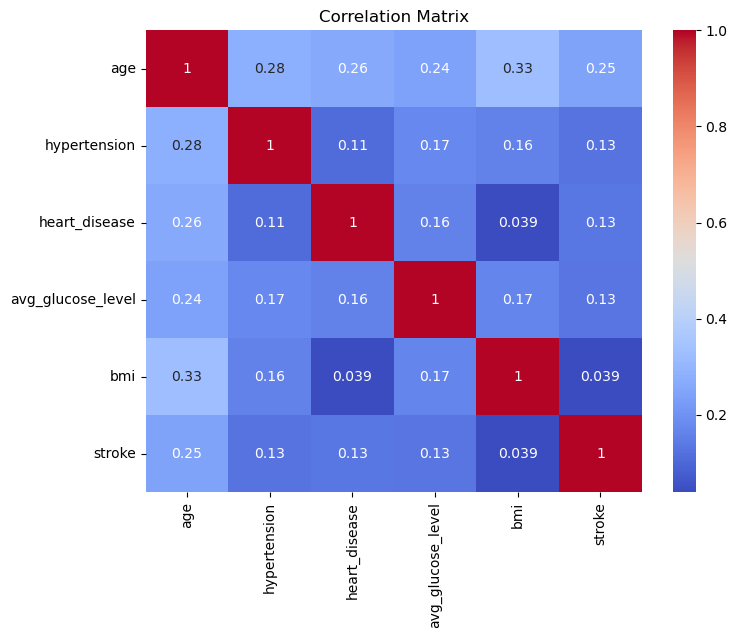

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [12]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [13]:
249 / (249 + 4860) * 100

4.873752201996477

<Axes: xlabel='stroke', ylabel='count'>

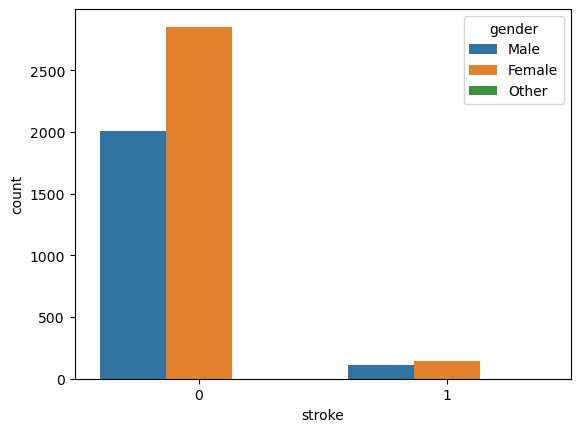

In [14]:
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

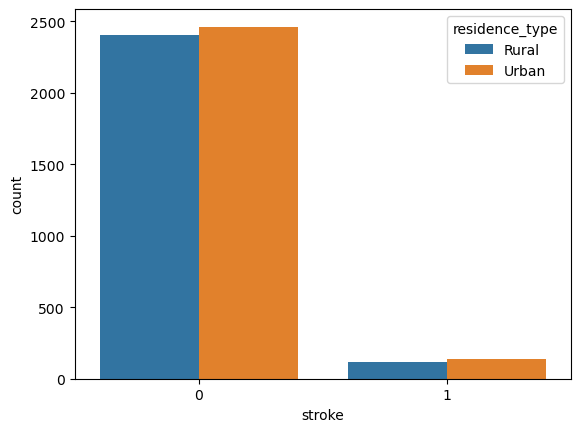

In [15]:
sns.countplot(x='stroke', hue='residence_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

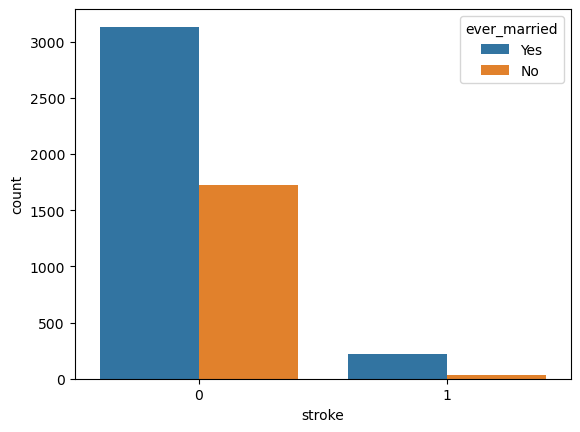

In [16]:
sns.countplot(x='stroke', hue='ever_married', data=df)

In [17]:
print(f'before: {len(df)}')
index_to_delete = df[df.gender == 'Other'].index
df = df.drop(index_to_delete)
print(f'before: {len(df)}')

before: 5110
before: 5109


In [18]:
# 80%          20% 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# 60%     20% 
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [19]:
for col in df.columns:
    print(col)
    print(df[col].unique())

gender
['Female' 'Male']
age
[5.90e+01 2.50e+01 2.30e+01 1.60e+01 1.80e+01 3.00e+01 6.30e+01 8.20e+01
 5.70e+01 1.30e+01 4.50e+01 2.10e+01 4.20e+01 7.00e+01 3.30e+01 5.50e+01
 6.40e+01 8.00e+00 8.00e+01 6.00e+01 5.00e+01 3.10e+01 3.90e+01 8.10e+01
 7.80e+01 6.90e+01 3.20e+01 7.50e+01 4.10e+01 2.40e+01 5.80e+01 3.50e+01
 6.80e+01 1.10e+01 4.30e+01 9.00e+00 7.20e+01 7.30e+01 5.60e+01 7.10e+01
 2.00e+01 5.10e+01 2.80e+01 1.90e+01 7.60e+01 4.00e+01 1.70e+01 2.00e+00
 2.60e+01 1.48e+00 5.30e+01 5.20e+01 3.60e+01 1.64e+00 7.40e+01 4.70e+01
 6.20e+01 3.40e+01 4.60e+01 7.90e+01 1.40e+01 6.70e+01 3.80e+01 6.00e+00
 5.40e+01 2.90e+01 7.70e+01 3.70e+01 4.40e+01 2.20e+01 7.20e-01 1.50e+01
 6.50e+01 4.90e+01 1.00e+00 5.00e+00 3.00e+00 4.80e+01 6.60e+01 1.20e+01
 6.10e+01 1.88e+00 1.80e+00 4.00e-01 7.00e+00 4.00e+00 2.70e+01 4.80e-01
 1.56e+00 8.00e-01 1.00e+01 1.08e+00 1.16e+00 1.60e-01 3.20e-01 1.72e+00
 1.24e+00 1.32e+00 5.60e-01 8.80e-01 2.40e-01 6.40e-01 1.40e+00 8.00e-02]
hypertension
[0 1]
he

In [20]:
categorical_features = df_train.select_dtypes(include='object').columns.to_list()
df_train_mi = df_train[categorical_features].apply(lambda s: mutual_info_score(s, y_train))
display.display(df_train_mi)

df_train_mi.sort_values(ascending=False)

gender            0.000004
ever_married      0.008389
work_type         0.008752
residence_type    0.000094
smoking_status    0.002239
dtype: float64

work_type         0.008752
ever_married      0.008389
smoking_status    0.002239
residence_type    0.000094
gender            0.000004
dtype: float64

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.fit_transform(df_val.to_dict(orient='records'))
X_test = dv.fit_transform(df_test.to_dict(orient='records'))

In [22]:
dv.get_feature_names_out()

array(['age', 'avg_glucose_level', 'bmi', 'ever_married=No',
       'ever_married=Yes', 'gender=Female', 'gender=Male',
       'heart_disease', 'hypertension', 'residence_type=Rural',
       'residence_type=Urban', 'smoking_status=Unknown',
       'smoking_status=formerly smoked', 'smoking_status=never smoked',
       'smoking_status=smokes', 'work_type=Govt_job',
       'work_type=Never_worked', 'work_type=Private',
       'work_type=Self-employed', 'work_type=children'], dtype=object)

In [23]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [24]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00439195, 0.0053031 , 0.01473302, ..., 0.04468905, 0.0055953 ,
       0.0099894 ])

In [25]:
y_decission = y_pred >= 0.5

In [26]:
round((y_val == y_decission).mean(), 2)

0.96

In [27]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = (y_pred >= 0.5).astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred[df_pred.actual == 1]

,probability,prediction,actual,correct
39,0.001038,0,1,False
78,0.098767,0,1,False
109,0.051606,0,1,False
142,0.208747,0,1,False
166,0.216422,0,1,False
203,0.253714,0,1,False
234,0.145971,0,1,False
250,0.014924,0,1,False
273,0.196392,0,1,False
307,0.139407,0,1,False


In [28]:
# round(df_pred.correct.mean(), 2)
df_pred.correct.mean()

0.9569471624266145

In [29]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
round(roc_auc_score(y_val, y_pred), 3)

0.809

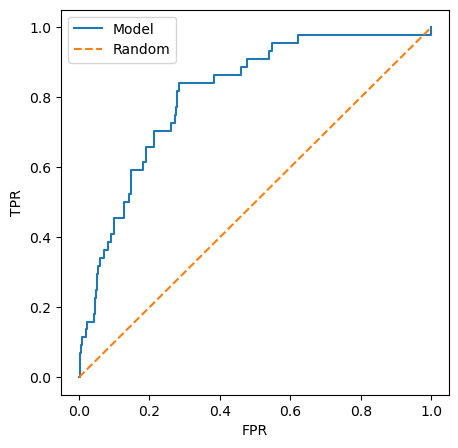

In [30]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [31]:
def calculate_feature_importance(target, feature):
    fpr, tpr, thresholds = roc_curve(target, feature)
    auc_val = auc(fpr, tpr)
    if auc_val < 0.5:
        auc_val = roc_auc_score(target, -feature)
    return auc_val, fpr, tpr

,Feature,AUC
0,age,0.835354
3,avg_glucose_level,0.620362
1,hypertension,0.604787
2,heart_disease,0.567076
4,bmi,0.562667


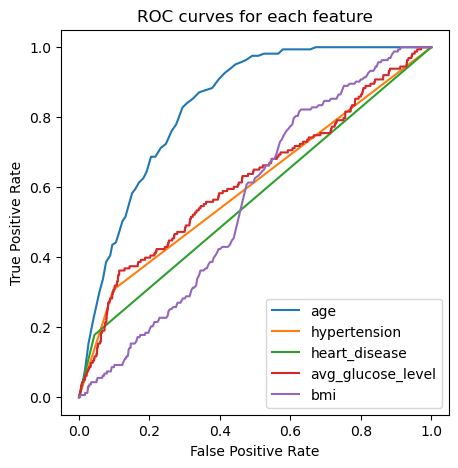

In [32]:
plt.figure(figsize=(5, 5))

auc_dict = {}
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
for feature in numerical_features:
    auc_val, fpr, tpr = calculate_feature_importance(y_train, df_train[feature])
    auc_dict[feature] = auc_val
    plt.plot(fpr, tpr, label=f'{feature}')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for each feature')

auc_df = pd.DataFrame(list(auc_dict.items()), columns=['Feature', 'AUC']).sort_values(by='AUC', ascending=False)
display.display(auc_df)

In [33]:
def train(df_train, y_train, C=1.0):
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    # print(dv.get_feature_names_out())
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

In [34]:
def predict(model, df):
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(df.to_dict(orient='records'))
    # print(dv.get_feature_names_out())
    return model.predict_proba(X)[:, 1]

In [35]:
model = train(df_train=df_train, y_train=y_train, C=10)
model

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [36]:
y_pred = predict(model=model, df=df_val)
y_decission = y_pred >= 0.5
(y_val == y_decission).mean()

0.9569471624266145

In [37]:
roc_auc_score(y_val, y_pred)

0.8088399330730619

In [38]:
y_pred = predict(model=model, df=df_test)
y_decission = y_pred >= 0.5
(y_test == y_decission).mean()

0.9598825831702544

In [39]:
round(roc_auc_score(y_test, y_pred), 3)

0.851

In [40]:
def accuracy(y_pred, y_target):
    y_decission = y_pred >= 0.5
    return (y_target == y_decission).mean()

In [41]:
C = [0.01, 0.1, 1, 10, 100]
res = {}
for c in C:
    m = train(df_train=df_train, y_train=y_train, C=c)
    y_pred = predict(model=m, df=df_val)
    acc = round(accuracy(y_pred=y_pred, y_target=y_val), 3)
    res[c] = acc
print(res)
max_acc = max(res.values())
min(c for c, value in res.items() if value == max_acc)

{0.01: 0.957, 0.1: 0.957, 1: 0.957, 10: 0.957, 100: 0.957}


0.01

In [42]:
C = [0.01, 0.1, 1, 10, 100]
res = {}
for c in C:
    m = train(df_train=df_train, y_train=y_train, C=c)
    y_pred = predict(model=m, df=df_val)
    # acc = round(accuracy(y_pred=y_pred, y_target=y_val), 3)
    res[c] = round(roc_auc_score(y_val, y_pred), 3)
print(res)
max_auc = max(res.values())
min(c for c, value in res.items() if value == max_auc)

{0.01: 0.712, 0.1: 0.793, 1: 0.809, 10: 0.809, 100: 0.809}


1

In [43]:
%%capture output
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
watch_list = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, evals=watch_list, num_boost_round=200, verbose_eval=5)

In [44]:
y_pred = model.predict(dval)

In [45]:
roc_auc_score(y_val, y_pred)

0.7614333519241494

In [46]:
def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        # print(f'{it_line=}, {train_line=}, {val_line=}')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        columns = ['num_iter', 'train_auc', 'val_auc']
        df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [47]:
df_score = parse_xgb_output(output)
# df_score

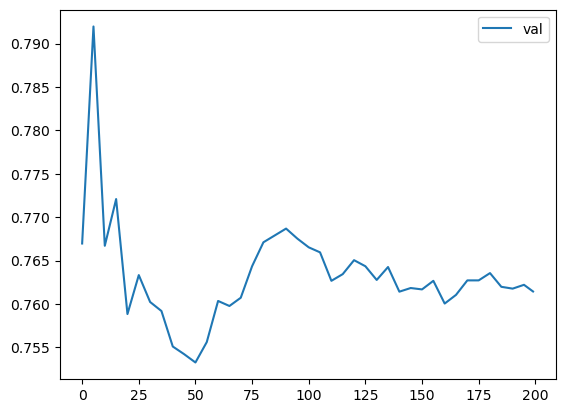

In [48]:
# plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [49]:
scores = {}

In [50]:
%%capture output
# eta = 0.01
# eta = 0.05
# eta = 0.1
# eta = 0.3
eta = 1.0
xgb_params = {
    'eta': eta,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, evals=watch_list, num_boost_round=200, verbose_eval=5)
key = f"{eta=}"
scores[key] = parse_xgb_output(output)

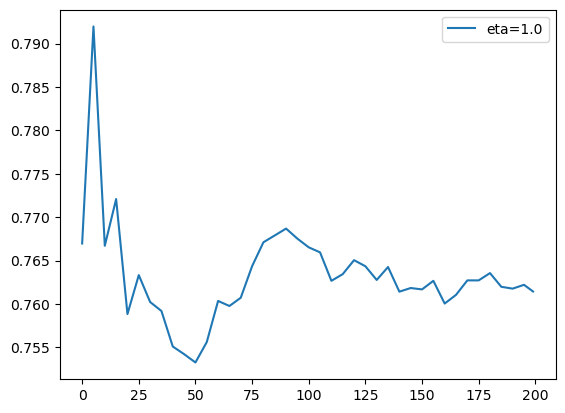

In [51]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [52]:
final_eta = 0.3

In [53]:
%%capture output
# max_depth = 6
max_depth = 4
# max_depth = 10
xgb_params = {
    'eta': final_eta,
    'max_depth': max_depth,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, evals=watch_list, num_boost_round=200, verbose_eval=5)
key = f"{max_depth=}"
scores[key] = parse_xgb_output(output)

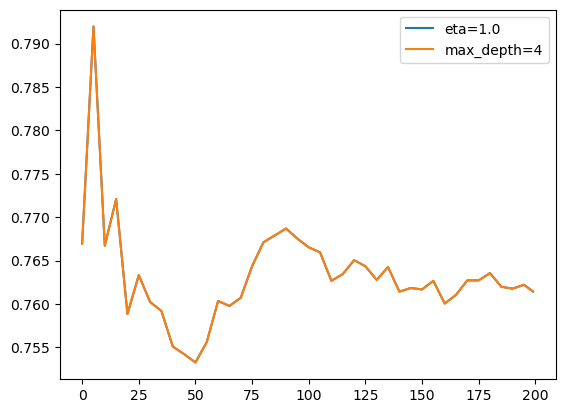

In [54]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [55]:
final_max_depth = 4

In [56]:
%%capture output
# min_child_weight = 1
# min_child_weight = 10
min_child_weight = 30
xgb_params = {
    'eta': final_eta,
    'max_depth': final_max_depth,
    'min_child_weight': min_child_weight,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, evals=watch_list, num_boost_round=200, verbose_eval=5)
key = f"{min_child_weight=}"
scores[key] = parse_xgb_output(output)

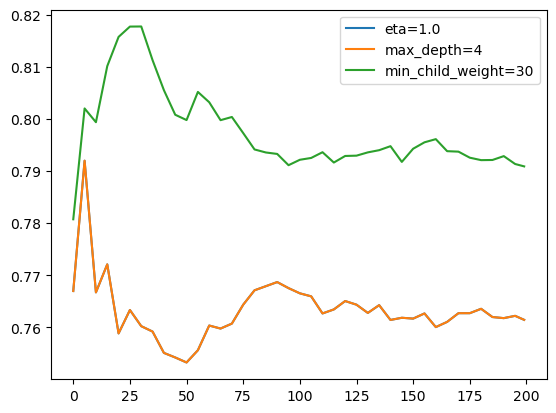

In [57]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [58]:
final_min_child_weight = 1

In [59]:
final_num_boost_round = 10

In [60]:
xgb_params = {
    'eta': final_eta,
    'max_depth': final_max_depth,
    'min_child_weight': final_min_child_weight,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=final_num_boost_round)

In [61]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8003346346904628

In [62]:
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8510204081632653

In [63]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.stroke.values
del df_full_train['stroke']

In [64]:
model = train(df_train=df_full_train, y_train=y_full_train, C=10)
model

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [65]:
y_pred = predict(model=model, df=df_test)

In [66]:
roc_auc_score(y_test, y_pred)

0.8526239067055393

In [67]:
people = df[df.stroke == 1].to_dict(orient='records')
people[0]

{'gender': 'Female',
 'age': 59.0,
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 'Yes',
 'work_type': 'Private',
 'residence_type': 'Rural',
 'avg_glucose_level': 116.44,
 'bmi': 23.8,
 'smoking_status': 'smokes',
 'stroke': 1}